In [ ]:
!pip install pandas

In [10]:
!pip install itables

     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     --- ------------------------------------ 0.1/1.4 MB 3.3 MB/s eta 0:00:01
     ------ --------------------------------- 0.2/1.4 MB 2.8 MB/s eta 0:00:01
     --------- ------------------------------ 0.3/1.4 MB 2.6 MB/s eta 0:00:01
     ------------- -------------------------- 0.5/1.4 MB 2.7 MB/s eta 0:00:01
     ------------------ --------------------- 0.6/1.4 MB 2.9 MB/s eta 0:00:01
     ---------------------- ----------------- 0.8/1.4 MB 3.0 MB/s eta 0:00:01
     ---------------------------- ----------- 1.0/1.4 MB 3.2 MB/s eta 0:00:01
     --------------------------------- ------ 1.2/1.4 MB 3.2 MB/s eta 0:00:01
     -------------------------------------- - 1.4/1.4 MB 3.3 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 3.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install numpy matplotlib

In [ ]:
!pip install seaborn


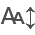

In [11]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [2]:
import pandas as pd
data = pd.read_csv("bgg-19m-reviews/bgg-19m-reviews.csv", usecols=['user', 'rating', 'ID', 'name'])

In [12]:
# ,user,rating,comment,ID,name
all_reviews = data
all_reviews

user  rating     ID      name
0                 Torsten    10.0  30549  Pandemic
1         mitnachtKAUBO-I    10.0  30549  Pandemic
2                  avlawn    10.0  30549  Pandemic
3              Mike Mayer    10.0  30549  Pandemic
4                 Mease19    10.0  30549  Pandemic
...                   ...     ...    ...       ...
18964802           Ceryon     3.1   1752      Haps
18964803        Gregarius     2.0   1752      Haps
18964804            Lajos     2.0   1752      Haps
18964805          Imagine     1.0   1752      Haps
18964806         gonzo104     1.0   1752      Haps

[18964807 rows x 4 columns]

In [13]:
games_rating_list = all_reviews.groupby('name')['rating'].apply(list).reset_index()
games_rating_list


name  \
0                                     "La Garde recule!"   
1      "Oh My God! There's An Axe In My Head." The Ga...   
2                                "Scratch One Flat Top!"   
3                                  "Tarleton's Quarter!"   
4                                                #MyLife   
...                                                  ...   
21435                                      曼荼羅 (Mandara)   
21436                                   猿道 (Monkey Road)   
21437          白と黒でトリテ (Trick-Taking in Black and White)   
21438                            目撃者たちの夜 (Witness Night)   
21439                    聖杯サクセション (Throne and the Grail)   

                                                  rating  
0      [8.0, 7.5, 7.0, 7.0, 7.0, 7.0, 6.5, 6.0, 6.0, ...  
1      [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10....  
2      [10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9....  
3      [10.0, 10.0, 9.5, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0...  
4      [8.0, 8.0, 8.0, 7.8, 7.5, 7.0, 7.0, 7.0, 7.0, ...  
...                                                  ...  
21435  [10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.5,...  
21436  [8.56, 8.5, 8.0, 8.0, 7.5, 7.5, 7.4, 7.25, 7.1...  
21437  [10.0, 9.0, 8.6, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0,...  
21438  [8.0, 8.0, 7.8, 7.5, 7.5, 7.0, 7.0, 7.0, 7.0, ...  
21439  [10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0...  

[21440 rows x 2 columns]

In [5]:
games_rating_list['num_reviews'] = games_rating_list['rating'].apply(len)

# Step 2: Find the game with the largest number of reviews
most_reviews_game = games_rating_list.loc[games_rating_list['num_reviews'].idxmax()]

# Display the result
print(f"Game with the largest number of reviews:\nName: {most_reviews_game['name']}\nNumber of Reviews: {most_reviews_game['num_reviews']}")

Game with the largest number of reviews:
Name: Pandemic
Number of Reviews: 108971


In [14]:
print(games_rating_list[:3])

                                                name  \
0                                 "La Garde recule!"   
1  "Oh My God! There's An Axe In My Head." The Ga...   
2                            "Scratch One Flat Top!"   

                                              rating  
0  [8.0, 7.5, 7.0, 7.0, 7.0, 7.0, 6.5, 6.0, 6.0, ...  
1  [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10....  
2  [10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9....  


In [7]:
game_rating_freq_dictionary = []
game_with_max_ratings = None
max_rating_count = 0

for game in games_rating_list.itertuples(index=False):
    frequency = {}
    for rating_value in game.rating:
        if rating_value in frequency:
            frequency[rating_value] += 1
        else:
            frequency[rating_value] = 1
    game_rating_freq_dictionary.append((game.name, frequency))

    num_ratings = len(game.rating)  # Get the number of ratings for the current game
    if num_ratings > max_rating_count:
        max_rating_count = num_ratings
        game_with_max_ratings = (game.name, frequency)

game_with_max_ratings

('Pandemic',
 {10.0: 6500,
  9.999: 1,
  9.9978: 1,
  9.99: 3,
  9.98: 1,
  9.97: 2,
  9.95: 1,
  9.93: 1,
  9.92167: 1,
  9.92: 1,
  9.90667: 1,
  9.9: 29,
  9.86: 1,
  9.85: 5,
  9.81333: 1,
  9.8: 39,
  9.76: 1,
  9.75: 8,
  9.74: 1,
  9.73: 1,
  9.72: 2,
  9.7: 22,
  9.68: 1,
  9.65: 1,
  9.64: 1,
  9.62: 4,
  9.6: 30,
  9.55: 1,
  9.54: 2,
  9.52: 1,
  9.5: 814,
  9.45333: 1,
  9.44: 2,
  9.435: 1,
  9.4: 42,
  9.38: 1,
  9.35556: 1,
  9.35: 1,
  9.32: 1,
  9.3: 55,
  9.28: 1,
  9.26667: 1,
  9.25: 30,
  9.248: 1,
  9.24: 3,
  9.233: 1,
  9.23: 2,
  9.215: 1,
  9.2: 71,
  9.19333: 1,
  9.19: 1,
  9.18: 2,
  9.17333: 1,
  9.16: 1,
  9.151: 1,
  9.15: 2,
  9.14667: 2,
  9.13188: 1,
  9.13: 2,
  9.12: 1,
  9.11: 1,
  9.10667: 1,
  9.1: 65,
  9.08667: 1,
  9.08: 1,
  9.05937: 1,
  9.05333: 1,
  9.05: 2,
  9.04562: 1,
  9.03: 2,
  9.02: 3,
  9.011: 1,
  9.01: 2,
  9.00667: 2,
  9.004: 1,
  9.0: 14715,
  8.99: 4,
  8.987: 1,
  8.98667: 1,
  8.97: 1,
  8.96: 3,
  8.95: 3,
  8.92: 2,
  8.

In [15]:
frequency_dict = game_with_max_ratings

In [21]:
game_with_max_ratings

('Pandemic',
 {10.0: 6500,
  9.999: 1,
  9.9978: 1,
  9.99: 3,
  9.98: 1,
  9.97: 2,
  9.95: 1,
  9.93: 1,
  9.92167: 1,
  9.92: 1,
  9.90667: 1,
  9.9: 29,
  9.86: 1,
  9.85: 5,
  9.81333: 1,
  9.8: 39,
  9.76: 1,
  9.75: 8,
  9.74: 1,
  9.73: 1,
  9.72: 2,
  9.7: 22,
  9.68: 1,
  9.65: 1,
  9.64: 1,
  9.62: 4,
  9.6: 30,
  9.55: 1,
  9.54: 2,
  9.52: 1,
  9.5: 814,
  9.45333: 1,
  9.44: 2,
  9.435: 1,
  9.4: 42,
  9.38: 1,
  9.35556: 1,
  9.35: 1,
  9.32: 1,
  9.3: 55,
  9.28: 1,
  9.26667: 1,
  9.25: 30,
  9.248: 1,
  9.24: 3,
  9.233: 1,
  9.23: 2,
  9.215: 1,
  9.2: 71,
  9.19333: 1,
  9.19: 1,
  9.18: 2,
  9.17333: 1,
  9.16: 1,
  9.151: 1,
  9.15: 2,
  9.14667: 2,
  9.13188: 1,
  9.13: 2,
  9.12: 1,
  9.11: 1,
  9.10667: 1,
  9.1: 65,
  9.08667: 1,
  9.08: 1,
  9.05937: 1,
  9.05333: 1,
  9.05: 2,
  9.04562: 1,
  9.03: 2,
  9.02: 3,
  9.011: 1,
  9.01: 2,
  9.00667: 2,
  9.004: 1,
  9.0: 14715,
  8.99: 4,
  8.987: 1,
  8.98667: 1,
  8.97: 1,
  8.96: 3,
  8.95: 3,
  8.92: 2,
  8.

In [9]:
game_rating_freq_dictionary

[('"La Garde recule!"',
  {8.0: 1,
   7.5: 1,
   7.0: 4,
   6.5: 1,
   6.0: 13,
   5.0: 7,
   4.75: 1,
   4.0: 3,
   3.0: 1,
   2.0: 3}),
 ('"Oh My God! There\'s An Axe In My Head." The Game of International Diplomacy ',
  {10.0: 8,
   9.0: 2,
   8.0: 5,
   7.5: 2,
   7.2: 1,
   7.0: 10,
   6.5: 4,
   6.0: 15,
   5.5: 1,
   5.3: 1,
   5.2: 1,
   5.0: 11,
   4.5: 1,
   4.44: 1,
   4.0: 8,
   3.0: 4,
   2.9: 1,
   2.0: 4,
   1.0: 4}),
 ('"Scratch One Flat Top!"',
  {10.0: 3,
   9.0: 8,
   8.5: 1,
   8.0: 13,
   7.5: 1,
   7.47: 1,
   7.0: 10,
   6.5: 3,
   6.0: 9,
   5.0: 2,
   3.0: 1}),
 ('"Tarleton\'s Quarter!"',
  {10.0: 2,
   9.5: 1,
   9.0: 2,
   8.0: 17,
   7.5: 1,
   7.0: 12,
   6.0: 10,
   5.0: 2,
   4.0: 1,
   3.0: 1,
   1.0: 1}),
 ('#MyLife',
  {8.0: 3,
   7.8: 1,
   7.5: 1,
   7.0: 9,
   6.75: 1,
   6.6: 1,
   6.5: 6,
   6.0: 16,
   5.0: 9,
   4.0: 8,
   3.0: 4,
   2.0: 1}),
 ("'65: Squad-Level Combat in the Jungles of Vietnam",
  {10.0: 8,
   9.5: 1,
   9.0: 17,
   8.75: 1,
 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
frequency_dict = game_rating_freq_dictionary[1][1]
total_count_of_ratings = sum(frequency_dict.values())

outcomes = list(frequency_dict.keys())
probabilities = [freq / total_count_of_ratings for freq in frequency_dict.values()]

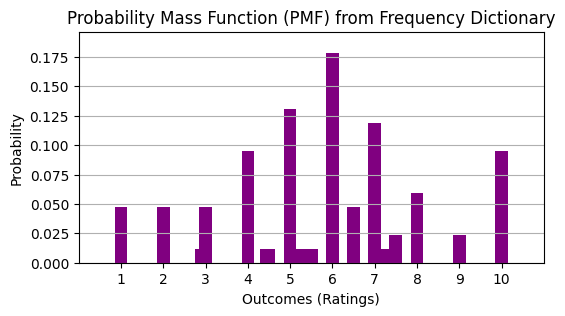

In [20]:
plt.figure(figsize=(6, 3))
plt.bar(outcomes, probabilities, color='purple', width=0.3)
plt.xticks([i for i in range(1, 11)])
plt.title('Probability Mass Function (PMF) from Frequency Dictionary')
plt.xlabel('Outcomes (Ratings)')
plt.ylabel('Probability')
plt.ylim(0, max(probabilities) * 1.1)  # Set y-limits for better visibility
plt.xlim(0, 11)  # Set x-axis range from 0 to 10
plt.grid(axis='y')
plt.show()